In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('../Dataset/feature_output_10k_final.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,text,generated,length,label,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,split_text,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,0,321478,Becoming your on self is a crucial aspect of a...,1.0,2276,AI,0.038,0.683,0.279,0.9987,0.590000,57.91,10.6,9.079517,"['Becoming', 'your', 'on', 'self', 'is', 'a', ...",27,21,20.315789,60,1
1,1,49275,Phones and Driving\n\nPhones and techknowledge...,0.0,2381,Human,0.092,0.819,0.090,-0.5986,0.534348,81.33,5.7,33.769810,"['Phones', 'and', 'Driving\n\nPhones', 'and', ...",29,11,14.419355,69,4
2,2,123215,"You should be a Seagoing Cowboy.\n\nIt is fun,...",0.0,827,Human,0.018,0.755,0.227,0.9894,0.455934,95.67,2.3,21.495440,"['You', 'should', 'be', 'a', 'Seagoing', 'Cowb...",6,3,8.222222,28,4
3,3,190730,"As an 8th grader, I believe that committing to...",1.0,2325,AI,0.006,0.811,0.184,0.9956,0.543547,57.10,10.9,7.064874,"['As', 'an', '8th', 'grader,', 'I', 'believe',...",20,28,22.222222,54,2
4,4,329038,"You should join the Seagoing Cowboys because, ...",0.0,1183,Human,0.034,0.789,0.177,0.9886,0.514757,85.28,4.2,50.013187,"['You', 'should', 'join', 'the', 'Seagoing', '...",16,10,10.666667,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,188710,Seeking advice from multiple people when facin...,1.0,1987,AI,0.051,0.785,0.164,0.9892,0.482265,40.58,13.1,34.399616,"['Seeking', 'advice', 'from', 'multiple', 'peo...",12,10,20.466667,28,2
9996,9996,9688,"The Face on Mars, is it really what NASA says ...",0.0,2374,Human,0.023,0.938,0.039,0.8044,0.443304,74.22,8.4,42.247635,"['The', 'Face', 'on', 'Mars,', 'is', 'it', 're...",20,22,19.954545,40,10
9997,9997,31949,"Title: Exploring Venus\n\nVenus, the second pl...",1.0,2470,AI,0.022,0.926,0.052,0.9022,0.494501,48.03,12.3,17.237017,"['Title:', 'Exploring', 'Venus\n\nVenus,', 'th...",21,6,21.444444,59,9
9998,9998,481082,"Hey, Mrs. Smith! Here's my essay on the benefi...",1.0,2028,AI,0.064,0.719,0.217,0.9968,0.457093,77.10,9.4,9.456690,"['Hey,', 'Mrs.', 'Smith!', ""Here's"", 'my', 'es...",25,22,24.125000,61,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               10000 non-null  int64  
 1   Unnamed: 0                 10000 non-null  int64  
 2   text                       10000 non-null  object 
 3   generated                  10000 non-null  float64
 4   length                     10000 non-null  int64  
 5   label                      10000 non-null  object 
 6   neg                        10000 non-null  float64
 7   neu                        10000 non-null  float64
 8   pos                        10000 non-null  float64
 9   compound                   10000 non-null  float64
 10  subjectivity_score         10000 non-null  float64
 11  flesch_reading_ease_score  10000 non-null  float64
 12  flesch_kincaid_grade       10000 non-null  float64
 13  Perplexity Score           10000 non-null  floa

In [5]:
features_to_divide = ['no_discourse_markers','no_pronouns','grammatical_errors','named_entity_counts']
df[features_to_divide] = df[features_to_divide].div(df['length'],axis=0)

In [6]:
columns_to_drop = [0, 1, 2, 4, 5, 14] 
df = df.drop(columns=df.columns[columns_to_drop])
df

,generated,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,1.0,0.038,0.683,0.279,0.9987,0.590000,57.91,10.6,9.079517,0.011863,0.009227,20.315789,0.026362,0.000439
1,0.0,0.092,0.819,0.090,-0.5986,0.534348,81.33,5.7,33.769810,0.012180,0.004620,14.419355,0.028979,0.001680
2,0.0,0.018,0.755,0.227,0.9894,0.455934,95.67,2.3,21.495440,0.007255,0.003628,8.222222,0.033857,0.004837
3,1.0,0.006,0.811,0.184,0.9956,0.543547,57.10,10.9,7.064874,0.008602,0.012043,22.222222,0.023226,0.000860
4,0.0,0.034,0.789,0.177,0.9886,0.514757,85.28,4.2,50.013187,0.013525,0.008453,10.666667,0.021133,0.003381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.051,0.785,0.164,0.9892,0.482265,40.58,13.1,34.399616,0.006039,0.005033,20.466667,0.014092,0.001007
9996,0.0,0.023,0.938,0.039,0.8044,0.443304,74.22,8.4,42.247635,0.008425,0.009267,19.954545,0.016849,0.004212
9997,1.0,0.022,0.926,0.052,0.9022,0.494501,48.03,12.3,17.237017,0.008502,0.002429,21.444444,0.023887,0.003644
9998,1.0,0.064,0.719,0.217,0.9968,0.457093,77.10,9.4,9.456690,0.012327,0.010848,24.125000,0.030079,0.002465


In [7]:
X = df.drop(columns = ['generated'])
y = df.generated

X_features = X.columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=28)

In [ ]:
# random_forest_model = RandomForestClassifier(
#     max_depth=7,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     random_state=28)

# param_grid = {
#     'n_estimators': [100, 150, 200]
# }
                         
# grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# best_random_forest_model = grid_search.best_estimator_
# y_pred = best_random_forest_model.predict(X_test)

Best Parameters: {'n_estimators': 100}

In [8]:
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train,y_train)

y_pred = log_reg_model.predict(X_test)

In [9]:
def evaluate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1, conf_matrix = evaluate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8645
Precision: 0.8389355742296919
Recall: 0.7933774834437086
F1 Score: 0.8155207624234172
Confusion Matrix:
[[1130  115]
 [ 156  599]]


## With New Data for Paraphrase Attack

In [18]:
new_df = pd.read_csv('../Paraphrase/ai_human_with_features.csv')
new_df

,Unnamed: 0.1,Unnamed: 0,text,generated,paraphrased,length,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,split_text,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,1612,280630.0,"As a 8thgrade student, I believe that creating...",1.0,"As an 8th grade student, I believe that establ...",1350,0.000,0.766,0.234,0.9908,0.622619,42.92,12.2,16.321074,"['As', 'an', '8th', 'grade', 'student,', 'I', ...",13,4,17.727273,8,2
1,523,203670.0,The use of single use plastic products has bec...,1.0,The widespread use of disposable plastic items...,1848,0.066,0.890,0.044,-0.7128,0.375641,38.72,11.7,12.480599,"['The', 'widespread', 'use', 'of', 'disposable...",18,2,14.444444,17,0
2,1140,195582.0,"Sir Winston Churchill, a celebrated statesman,...",1.0,"forward, eventually becoming one of the great...",1145,0.135,0.599,0.265,0.9839,0.437500,44.75,11.5,15.235827,"['', 'forward,', 'eventually', 'becoming', 'on...",11,2,16.272727,17,2
3,1355,266337.0,**The Use of Facial Action Coding System in th...,1.0,The Facial Action Coding System (FACS) is a ne...,1798,0.060,0.726,0.214,0.9920,0.495674,35.68,12.9,9.636415,"['The', 'Facial', 'Action', 'Coding', 'System'...",10,2,17.066667,21,2
4,1542,110230.0,## Introduction\n\nThe Face OE Mars is a promi...,1.0,The Face on Mars is a well-known feature on th...,988,0.044,0.843,0.113,0.8666,0.522222,40.08,13.3,18.851681,"['The', 'Face', 'on', 'Mars', 'is', 'a', 'well...",7,1,19.750000,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,131567,NaN,"Dear State Senator,\n\nIt has come to my atten...",0.0,"Dear State Senator,\n\nIt has come to my atten...",2767,0.040,0.810,0.150,0.9962,0.601775,71.95,7.2,20.290138,"['Dear', 'State', 'Senator,\n\nIt', 'has', 'co...",26,118,10.659574,55,8
1996,183160,NaN,Should teachers or students design summer proj...,0.0,Should teachers or students design summer proj...,2870,0.061,0.765,0.174,0.9971,0.504802,67.99,8.8,17.920427,"['Should', 'teachers', 'or', 'students', 'desi...",23,120,20.000000,52,2
1997,122396,NaN,We should get rid of the electoral college bec...,0.0,We should get rid of the electoral college bec...,4392,0.090,0.786,0.124,0.9826,0.584332,61.97,9.0,22.413544,"['We', 'should', 'get', 'rid', 'of', 'the', 'e...",30,208,15.851064,77,8
1998,145889,NaN,I think people should participate in the Seago...,0.0,I think people should participate in the Seago...,1657,0.012,0.798,0.190,0.9963,0.404202,77.16,7.3,38.715046,"['I', 'think', 'people', 'should', 'participat...",21,68,18.000000,31,6


In [19]:
new_df[features_to_divide] = new_df[features_to_divide].div(new_df['length'],axis=0)

In [20]:
columns_to_drop = [0,1,2,4,5,14] 
new_df = new_df.drop(columns=new_df.columns[columns_to_drop])
new_df

,generated,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,1.0,0.000,0.766,0.234,0.9908,0.622619,42.92,12.2,16.321074,0.009630,0.002963,17.727273,0.005926,0.001481
1,1.0,0.066,0.890,0.044,-0.7128,0.375641,38.72,11.7,12.480599,0.009740,0.001082,14.444444,0.009199,0.000000
2,1.0,0.135,0.599,0.265,0.9839,0.437500,44.75,11.5,15.235827,0.009607,0.001747,16.272727,0.014847,0.001747
3,1.0,0.060,0.726,0.214,0.9920,0.495674,35.68,12.9,9.636415,0.005562,0.001112,17.066667,0.011680,0.001112
4,1.0,0.044,0.843,0.113,0.8666,0.522222,40.08,13.3,18.851681,0.007085,0.001012,19.750000,0.020243,0.006073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.040,0.810,0.150,0.9962,0.601775,71.95,7.2,20.290138,0.009396,0.042645,10.659574,0.019877,0.002891
1996,0.0,0.061,0.765,0.174,0.9971,0.504802,67.99,8.8,17.920427,0.008014,0.041812,20.000000,0.018118,0.000697
1997,0.0,0.090,0.786,0.124,0.9826,0.584332,61.97,9.0,22.413544,0.006831,0.047359,15.851064,0.017532,0.001821
1998,0.0,0.012,0.798,0.190,0.9963,0.404202,77.16,7.3,38.715046,0.012674,0.041038,18.000000,0.018709,0.003621


In [21]:
y_new = new_df.generated  # First column is y
X_new = new_df.drop(columns = ['generated']) 

X_new

,neg,neu,pos,compound,subjectivity_score,flesch_reading_ease_score,flesch_kincaid_grade,Perplexity Score,no_discourse_markers,no_pronouns,mean_words_per_sentence,grammatical_errors,named_entity_counts
0,0.000,0.766,0.234,0.9908,0.622619,42.92,12.2,16.321074,0.009630,0.002963,17.727273,0.005926,0.001481
1,0.066,0.890,0.044,-0.7128,0.375641,38.72,11.7,12.480599,0.009740,0.001082,14.444444,0.009199,0.000000
2,0.135,0.599,0.265,0.9839,0.437500,44.75,11.5,15.235827,0.009607,0.001747,16.272727,0.014847,0.001747
3,0.060,0.726,0.214,0.9920,0.495674,35.68,12.9,9.636415,0.005562,0.001112,17.066667,0.011680,0.001112
4,0.044,0.843,0.113,0.8666,0.522222,40.08,13.3,18.851681,0.007085,0.001012,19.750000,0.020243,0.006073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.040,0.810,0.150,0.9962,0.601775,71.95,7.2,20.290138,0.009396,0.042645,10.659574,0.019877,0.002891
1996,0.061,0.765,0.174,0.9971,0.504802,67.99,8.8,17.920427,0.008014,0.041812,20.000000,0.018118,0.000697
1997,0.090,0.786,0.124,0.9826,0.584332,61.97,9.0,22.413544,0.006831,0.047359,15.851064,0.017532,0.001821
1998,0.012,0.798,0.190,0.9963,0.404202,77.16,7.3,38.715046,0.012674,0.041038,18.000000,0.018709,0.003621


In [24]:
pred = log_reg_model.predict(X_new)

/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
def evaluate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1, conf_matrix = evaluate_metrics(y_new, pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.499
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[ 998    2]
 [1000    0]]


## Investigation

In [26]:
ai_df = df[df['generated'] == 1]
ai_df
ai_df_scaled = scaler.fit_transform(ai_df)
ai_df_scaled = pd.DataFrame(ai_df_scaled, columns=ai_df.columns)

In [27]:
human_train_df = df[df['generated'] == 0 ]
human_train_df
human_train_df_scaled = scaler.fit_transform(human_train_df)
human_train_df_scaled = pd.DataFrame(human_train_df_scaled, columns=human_train_df.columns)

In [28]:
para_df = new_df[new_df['generated']==1]
para_df
para_df_scaled = scaler.fit_transform(para_df)
para_df_scaled = pd.DataFrame(para_df_scaled, columns=para_df.columns)

In [29]:
human_new_df = new_df[new_df['generated']==0]
human_new_df
human_new_df_scaled = scaler.fit_transform(human_new_df)
human_new_df_scaled = pd.DataFrame(human_new_df_scaled, columns=human_new_df.columns)

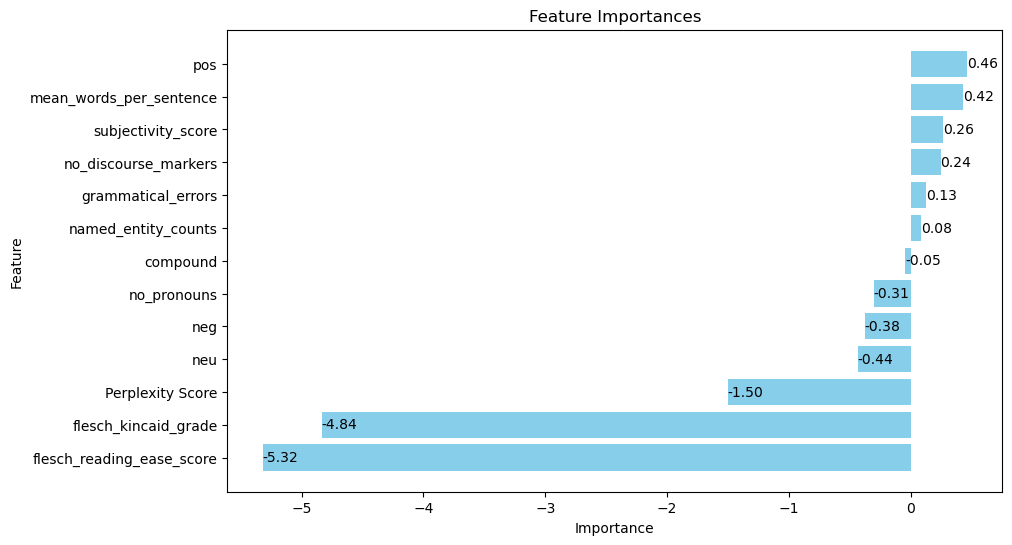

In [37]:
import matplotlib.pyplot as plt

feature_importances = log_reg_model.coef_[0]
importance_df = pd.DataFrame({'Feature': X_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Add labels for each bar
for bar, value in zip(bars, importance_df['Importance']):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


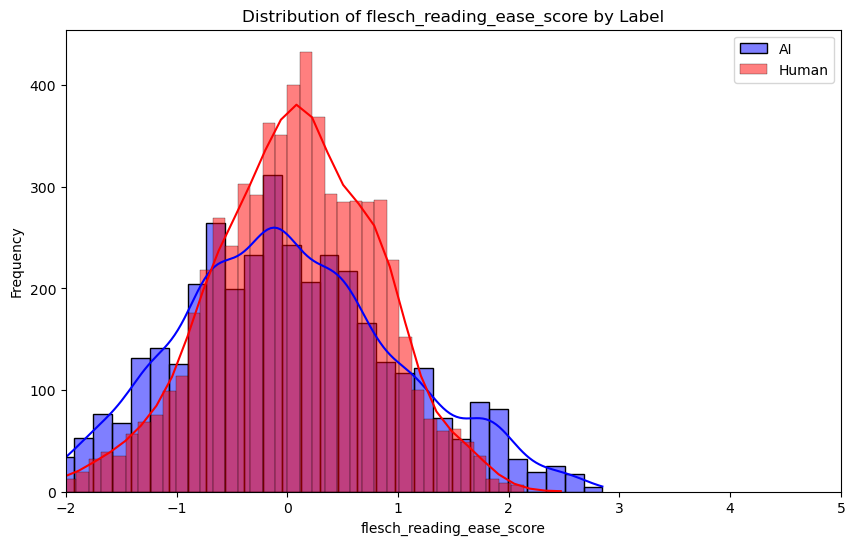

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram or density plot for label 0
sns.histplot(ai_df_scaled['flesch_reading_ease_score'], kde=True, color='blue', label='AI')

# Plot histogram or density plot for label 1
sns.histplot(human_train_df_scaled['flesch_reading_ease_score'], kde=True, color='red', label='Human')

# Add labels and title
plt.xlabel('flesch_reading_ease_score')
plt.ylabel('Frequency')
plt.title('Distribution of flesch_reading_ease_score by Label')
plt.xlim(-2, 5)
# Add legend
plt.legend()

# Show plot
plt.show()


/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yattmeo/Desktop/SMU/Code/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


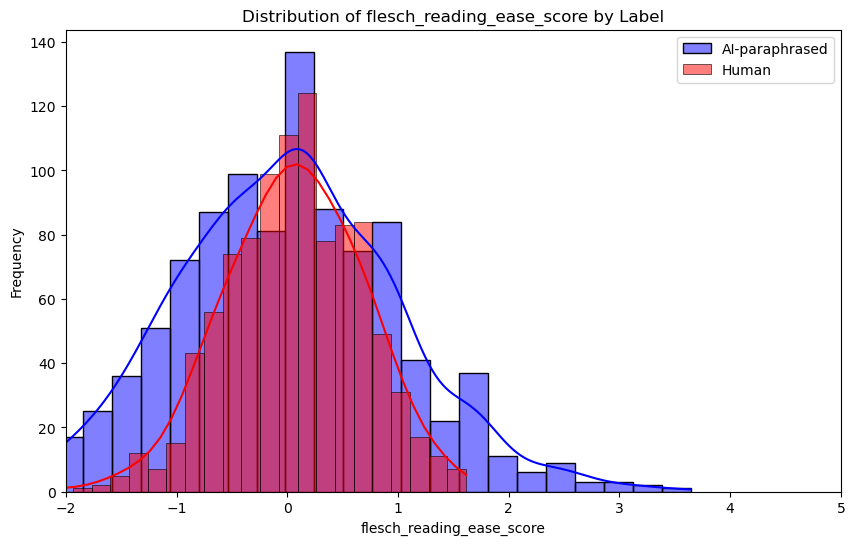

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Assuming the continuous feature column is named 'continuous_feature'
# Assuming the label column is named 'label'

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot histogram or density plot for label 0
sns.histplot(para_df_scaled['flesch_reading_ease_score'], kde=True, color='blue', label='AI-paraphrased')

# Plot histogram or density plot for label 1
sns.histplot(human_new_df_scaled['flesch_reading_ease_score'], kde=True, color='red', label='Human')

# Add labels and title
plt.xlabel('flesch_reading_ease_score')
plt.ylabel('Frequency')
plt.title('Distribution of flesch_reading_ease_score by Label')
plt.xlim(-2, 5)
# Add legend
plt.legend()

# Show plot
plt.show()